In [48]:
from IPython.display import HTML, Latex

这里学习的时候，同时学习 matplotlib。这里学习就反复和自己感兴趣的领域去关联，不怕超纲，不怕重复。**正确的话要反复讲，年年讲，月月讲，天天讲，讲到滚瓜烂熟也要讲**。

# matplotlib 

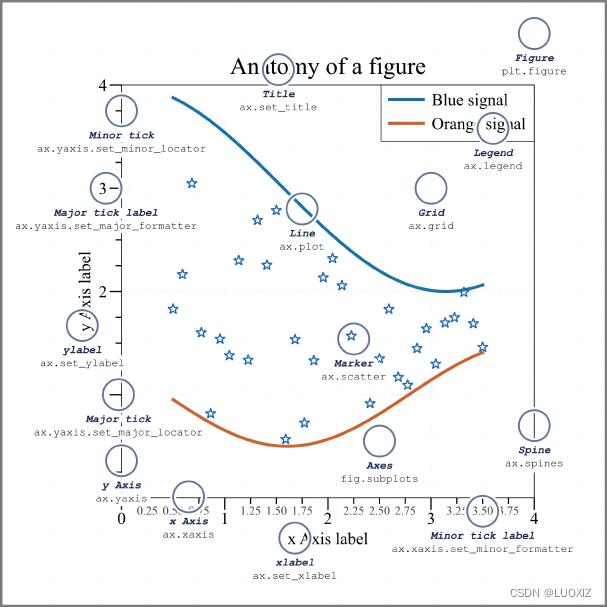

**Figure**，绘图窗口，代表操作系统的一个窗口，或者jupyter中显示的一张图片

**Axes**，子图，表示一个坐标系以及其内容。一个Figure可以有多个Axes。Axes包含标题title，图例legend，脊线Spine（实际上就是坐标轴，有top，right，bottom，left四个，可以控制位置）等要素

**Artist**，元素绘制者，如线，点等。

绘图时，我们调用Axes的方法，得到各个Artist，然后执行Figure的show方法实际展示图像。plt提供了诸多静态方法，它们操作的是内置的Figure和Axes对象，可以通过gcf，gca方法得到。

一个很奇葩的地方是，各种绘图方法，是先接受x轴分量的集合，再接受y轴分量的集合，而非是使用xy对集合。这确实在使用numpy时更加方便一些。

下面使用撒点法求pi：

Text(0.5, 0.5, 'mypi=3.12')

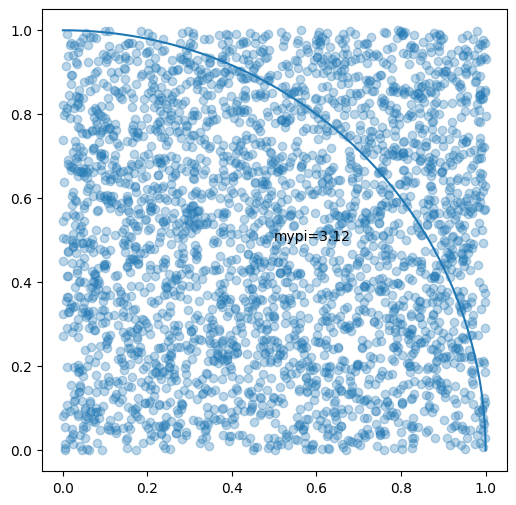

In [49]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

COUNT = 3000

points = np.random.rand(COUNT, 2) # COUNT 个点
thetas = np.linspace(0, np.pi / 2, 100) # 0-90度的一个空间用来画圆弧
fig, axe = plt.gcf(), plt.gca() # 显式地拿到figure和axes
axe.scatter(points[:,0], points[:,1], alpha=0.3) # 画散点
axe.plot(np.cos(thetas), np.sin(thetas)) # 画单位圆圆弧

# 半径为1，则这四分之一圆的面积是 pi / 4，整个正方形的面积是1，找到和原点距离小于1的点， pi / 4 / 1 = count(距离小于1的点) / COUNT

fig.set_size_inches(6,6)
counts = 0
for x, y in points:
    if np.sqrt(x**2+y**2) <= 1:
        counts += 1
mypi = counts / COUNT * 4
axe.text(0.5, 0.5, f'{mypi=:.2f}')

## matplotlib 动画

通常使用`from matplotlib.animation import FuncAnimation`引入一个动画绘制类，该类允许反复调用一个函数，传入frame，并期待函数返回要绘制的Artist，或者修改既有的Artist去绘制动画。下面使用它去绘制一个圆。

In [50]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_circle():
    plt.gcf().set_size_inches(5,5)
    plt.xlim(left=-1.5,right=1.5)
    plt.ylim(bottom=-1.5,top=1.5)
    line, = plt.plot([1], [0])
    def loop(frame: int):
        # 假设30帧转一圈，这里的theta是当前要绘制到的线
        # 注意frame是从0开始算的
        theta = math.radians(frame / 30 * 360)
        thetas = np.linspace(0, theta, (frame % 31) * 3)
        line.set_data(np.cos(thetas), np.sin(thetas))
        return line, # blit == True 时会使用一种更高效的绘制方法，需要返回要重新渲染的artist
    return FuncAnimation(plt.gcf(), loop, 31, interval=33, blit=True)

ani = draw_circle()
plt.close() # 避免绘制
HTML(ani.to_jshtml())

# 二维向量

向量 Vector 就是**多维**空间中的一个点，向量有两种画法，要么画成一个点，要么画成带方向的线段（如果从原点开始画的话，就是从原点到该点的带方向线段），这是对向量，或者说实际上是n元组的两种看待方式——点或者带方向的线段。如果以带方向的线段去看待向量的话，这个线段的出发点是可以随意移动的，从这个意义上来说，向量的意义就是**向特定方向走特定距离**。注意这里引入了“方向”和距离，这证明必须要有**参照**，向量这个概念才能成立。孤零零画出一个点是表达不出任何东西的。

这里扯了一堆，但我感觉不要从这里建立心智模型！**只要记住向量可以是点，也可以是位移就够了**，除非是哪天想研究点哲学再研究这个吧！我现在要研究的是具体问题！坐标系总是在那里的，无论是二维还是三维还是更高维。

线性变换 Linear Transformation，是线性代数的一个重要概念，它将一个向量作为输入，以一个向量（维数可以不一样）作为输出，其中**保持被操作的向量的几何形状，比如，一个直线（上的所有点的集合）进行线性变换后，它仍旧是直线**。**矩阵可以用于表示线性变换**。

实际上，**矩阵可以当作函数去理解**，矩阵组合是满足函数组合的规律的，比如考虑缩放S、旋转R、平移T，合并这三个运算，先缩放，再旋转，再平移；对向量A（使用列向量去表示），有：

$$
M = T \cdot R \cdot S \\
MA = T \cdot (R \cdot (S A))
$$

它的形式和函数组合一样：

$$
y = f \circ  g \circ  h \\
y(x) = f(g(h(x)))
$$

函数组合满足结合律 $f \circ (g \circ h) = (f \circ g) \circ h$，矩阵运算同样满足结合律，这意味着上面的M完全可以通过T，R，S去计算出来，因此使用一个矩阵便可以表达三个操作，这种组合性对优化大有裨益。

向量操作包括加法，标量，减法，模等。

加法有两种理解——两次连续位移的结果，或者一个点进行一次位移。任意向量可以表示它各坐标轴上的**分量 Component** 的和。显然加法是可交换的。

数乘则可以理解为**缩放**，乘-1则是位移的反向，或者点随原点的中心对称，这同时也定义了减法——对点进行反向的位移，或者**从减数到被减数的位移**，如`(2, 3) - (1, 1)` 即为从`(1, 1)`到`(2, 3)`的位移，有图为证：

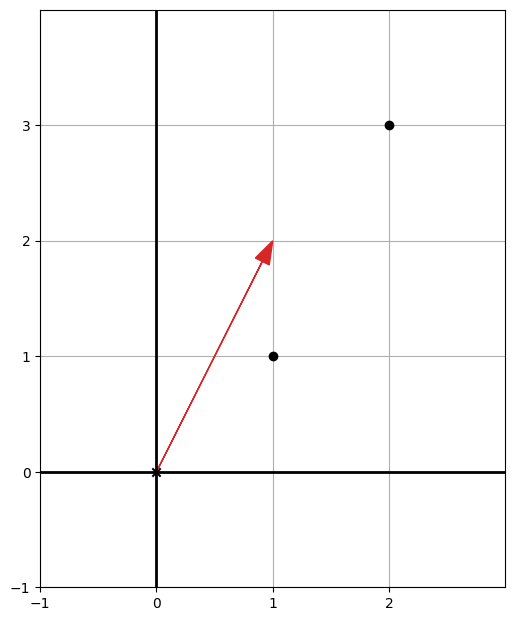

In [51]:
from vector_drawing import *
from vectors import *
draw(
    Points([1, 1], [2, 3]),
    Arrow(subtract([2, 3], [1, 1])) 
)

显然，从`(1, 1)`出发走这个位移（红色箭头标识）能够达到`(2, 3)`。

模就是求向量的长度，很简单——把向量转换为各个分量，然后使用勾股定理即可。当然，这里假定是直角坐标系，而坐标系不一定是直角的（坐标系唯一要满足的条件是，它的所有方向向量必须是**线性无关 Linear Independence** 的——没有一个方向向量能被其他的方向向量**线性组合 Linear Combination**得到），坐标系本身也是可以被线性变换的。

# 极坐标和三角函数

就二维来说，**笛卡儿坐标系 Cartesian Coordinates** 使用两个坐标表示一个向量，而**极坐标系 Polar Coordinates** 使用一个长度和一个角度去表示一个向量。

考虑在极坐标系中给定一个角度，该角度上的点的向量的坐标有一个固定的比值，这个比值就是正切tan，正切就是每单位的水平位移（x分量）对应多少的垂直位移（y分量），即`y / x`，对边比上邻边。与此相对的，正弦sin就是`垂直距离/距离`，余弦cos就是`水平距离/距离`。

另一种说法是，**一个角度的正弦和余弦值，就是该角度下走单位距离时，垂直和水平方向上的位移**。

所以，已知长度 $r$ 和角度 $\theta$，能够得到其笛卡儿坐标 $(r * cos(\theta), r * sin(\theta))$。

Python不使用**度 Degree**，而是使用**弧度 Radian**，**大多数数学家和工程人员都使用弧度**，换算关系是。

$$\pi\, \mathrm{radian} = 180^\circ$$

上面展示了从极坐标到笛卡儿坐标，那**从笛卡儿坐标到极坐标**呢？长度通过勾股定理求出来，但角度的话呢？这里需要**反三角函数**。

**三角函数根据弧度得到比值，而反三角函数根据比值得到弧度**。反三角函数以`arc`为前缀，但编程语言中的反三角函数简写为以`a`为前缀。

但使用反三角函数有一些问题——多个弧度可以得到同一个比值，考虑 $(-1, \sqrt{3})$ ，比如我们学过，$ sin(\frac{\pi}{3})=\frac{\sqrt{3}}{2}=sin(\frac{2}{3}\pi)$，但在python中，`math.asin(math.sqrt(3)/2) = math.pi/3`，我们要的不是这个。

一切高级语言都提供了`atan2(y, x)`函数，它接受笛卡儿坐标（而非接受比值），**y在先**，返回该坐标相对于X轴正方向逆时针或顺时针（负数）旋转的弧度。

python的反三角函数都返回`-pi/2`到`pi/2`的值。

笛卡儿坐标系适用于平移操作，而极坐标系适用于旋转操作——只需要**对角度进行增减**即可。下面的代码把笛卡儿坐标`(2, 1)`转换成极坐标，逆时针旋转两次`pi/3`再转换回来。

注意，极坐标系下的坐标并不满足向量的运算法则。

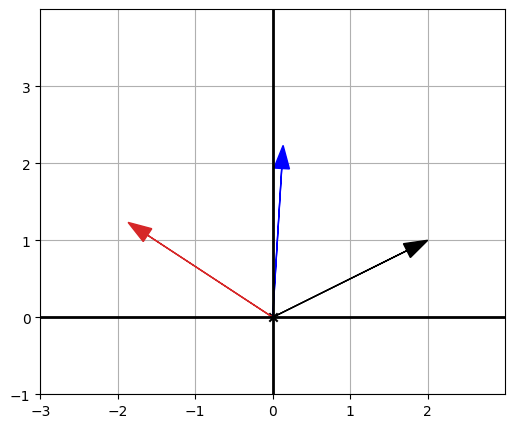

In [52]:
import math
def to_polar(cartesian_vector):
    """笛卡儿坐标系转极坐标系"""
    return length(cartesian_vector), math.atan2(cartesian_vector[1], cartesian_vector[0])

def to_cartesian(polar_vector):
    """极坐标系转笛卡儿坐标系"""
    dist = polar_vector[0]
    return dist * math.cos(polar_vector[1]), dist * math.sin(polar_vector[1])

v = to_polar((2, 1))
a = v[0], v[1] + math.pi / 3
b = v[0], a[1] + math.pi / 3

draw(Arrow(to_cartesian(v), color='black'), Arrow(to_cartesian(a), color='blue'), Arrow(to_cartesian(b)))

一个好玩的事是，考虑单位圆（半径为1）上的极坐标 $(1, \theta)$，它的笛卡儿坐标为 $(\cos \theta, \sin \theta)$。

## 推导旋转变换公式

上面考虑笛卡儿坐标 $(x, y)$ ，它对应的笛卡尔坐标是 $(l, \alpha)$，其中 $l=\sqrt{x^2+y^2},\alpha=\arctan(\frac{y}{x})$；将它逆时针旋转 $\theta$，得到的极坐标是 $(l, \alpha+\theta)$，再转换为笛卡儿坐标，为：

$$\begin{align}
(l\cos(\alpha+\theta), l\sin(\alpha+\theta))
& = (\sqrt{x^2+y^2}\cos(\arctan(\frac{y}{x})+\theta),\sqrt{x^2+y^2}\sin(\arctan(\frac{y}{x})+\theta)) \\
& = \sqrt{x^2+y^2}(\cos \arctan \frac{y}{x} \cos \theta - \sin \arctan \frac{y}{x} \sin \theta, \sin \arctan \frac{y}{x} \cos \theta + \cos \arctan \frac{y}{x} \sin \theta) \\
& = \sqrt{x^2+y^2}(\frac{x \cos \theta}{\sqrt{x^2+y^2}} - \frac{y \sin \theta}{\sqrt{x^2+y^2}}, \frac{y \cos \theta}{\sqrt{x^2+y^2}} + \frac{x \sin \theta}{\sqrt{x^2+y^2}}) \\
& = (x \cos \theta - y \sin \theta, y \cos \theta + x \sin \theta)
\end{align}$$

其中利用了四个公式：

$$\begin{align}
\cos(\arctan \frac{y}{x}) &= \frac{x}{\sqrt{x^2+y^2}}(when\  \theta = \arctan \frac{y}{x},then\  \tan \theta = \frac{y}{x}) \\
\sin(\arctan \frac{y}{x}) &= \frac{y}{\sqrt{x^2+y^2}} \\
\cos(x + y) &= \cos x \cos y - \sin x \sin y(和角公式) \\
\sin(x + y) &= \sin x \cos y + \cos x \sin y
\end{align}$$

上面的公式表明，笛卡儿坐标（向量） $(x, y)$ 逆时针旋转 $\theta$ ，得到 $(x \cos \theta - y \sin \theta, y \cos \theta + x \sin \theta)$，这是说，二维向量 $(x, y)$ 逆时针旋转 $\theta$ 得到$(x', y')$，其中：


$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
= \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix} 
\begin{bmatrix}
x \\
y
\end{bmatrix}$$

下面尝试测试它，把$(1, 1)$逆时针旋转60，120，180度：


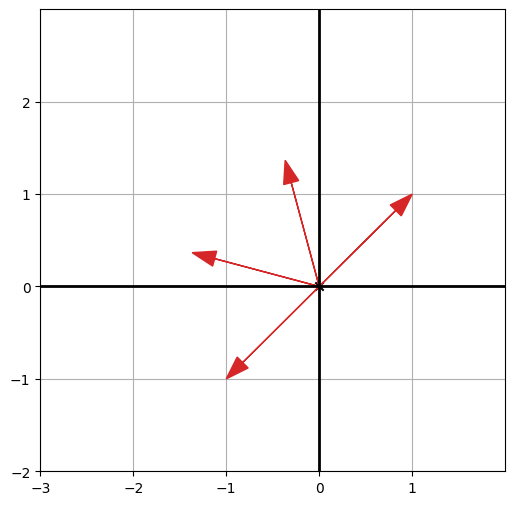

In [53]:
def my_rotate(x, y, theta):
    return x * math.cos(theta) - y * sin(theta), y * math.cos(theta) + x * math.sin(theta)

draw(
    Arrow((1, 1)),
    Arrow(my_rotate(1, 1, math.radians(60))),
    Arrow(my_rotate(1, 1, math.radians(120))),
    Arrow(my_rotate(1, 1, math.radians(180))),
)

## 缩放变换公式

考虑笛卡儿坐标 $(x, y)$，它缩放c倍后，得到笛卡儿坐标 $(cx, cy)$，容易写出缩放变换公式：

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix} =
\begin{bmatrix}
c & 0 \\
0 & c
\end{bmatrix} 
\begin{bmatrix}
x \\
y
\end{bmatrix} 
$$

## 推导平移变换公式——齐次坐标

旋转、缩放都是相对来说trivial的，但平移呢？这就靠北了。

考虑对笛卡儿坐标 $(x, y)$ 在x、y分量上平移 $t_x$，$t_y$，得到 $(x + t_x, y + t_y)$。这玩意儿没法使用矩阵运算去表示，因为这是一个**仿射变换 Affine Transformation**而非**线性变换**，只有线性变换能够使用矩阵运算去表示。

如何处理呢？我们可以增加一个维度：

$$\begin{align}
x' & = 1 \cdot x + 0 \cdot y + t_x \cdot 1 \\
y' & = 0 \cdot x + 1 \cdot y + t_y \cdot 1 \\
1  & = 0 \cdot x + 0 \cdot y + 1   \cdot 1  
\end{align}$$

即：

$$ 
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} =
\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

这种增加了一个维度的坐标，称为是原坐标的**齐次坐标Homogeneous Coordinates**，坐标 $(x, y)$ 的齐次坐标为 $(wx, wy, w)$（其中 $w \neq 0$）。**通过齐次坐标，能够把一切仿射变换转换为线性变换**，仿射变换包括斜切，平移等。

仿射变换下，直线始终是直线，平行线始终是平行线，比例关系始终保持；此外还有更广泛的**透视变换Perspective Transformation**，透视变换下平行线可能会不平行，比例关系也会变化。

**线性变换是仿射变换的特例，仿射变换是透视变换的特例。线性变换和仿射变换可能是可逆的，**

**透视变换是不可逆的**，深度信息丢失了，这就是说，无法无损地仅从单张透视图去还原原物体。

# 上升到三维

二维向量有三种可互换的表述：坐标对，一个特定方向的特定长度的线段（箭头），相对于原点的点；三维向量同样如此，只不过增加了一个维度，从平面到立体，从操作二维图形到操作三维物体。

三维空间中，尝试只使用一个点去表示向量是不行的——我们总是从“镜头”去看这个空间，而不同的点可能在镜头中处在同一个点的位置；一个解决方式是找到点的x，y，z轴上的分量，绘制成一个盒子。

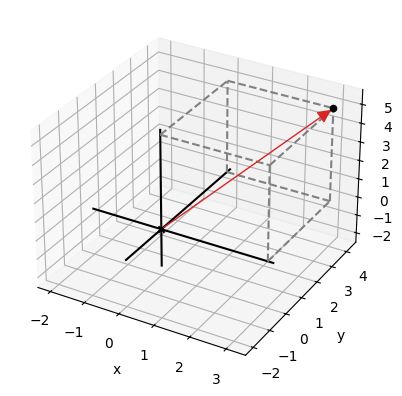

In [54]:
from draw3d import *

draw3d(
    Points3D((3, 4, 5)),
    Box3D(3, 4, 5),
    Arrow3D((3, 4, 5)),
)

## 三维向量运算

三维向量的加法，标量乘法，减法和二维版本是一致的心智模型，求向量的长度或两个向量的距离，我们也是比较熟悉的，直奔最陌生的部分。

三维向量同样有一种类似极坐标系的表示方式——**球坐标系Spherical Coordinates**，想象从正上方打一道光（z轴正方向到负方向），把向量在xoy平面上制造一个**投影**；规定向量长度是 $r$，投影和X轴正方向夹角为 $\theta$（和极坐标系一样，称为**方位角**），然后向量和Z轴正方向夹角为 $\phi$（读作fai，称为**极角**），这三个坐标便可以唯一地确定一个坐标。

球坐标系对我们不太好用——

1. 无法直接确认两个向量的角度（极坐标系直接求 $\theta$ 的差即可）
2. 能够方便绕z轴旋转，但绕其他轴旋转都不方便

下面绘制 $(1, -1, 1)$ 分别旋转极角和方位角的效果。

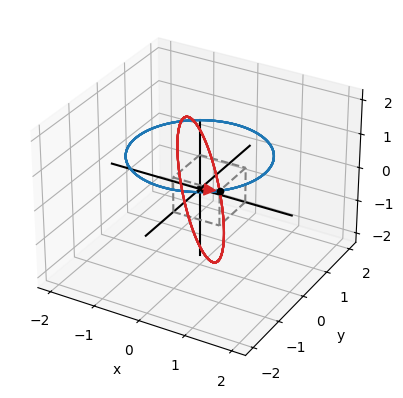

In [55]:
def cartesian2spherical(vec):
    x, y, z = vec
    lxy = math.sqrt(x**2+y**2)
    l = math.sqrt(sum(map(lambda x: x ** 2, vec)))
    theta = math.atan2(y, x)
    phi = math.atan2(lxy, z)
    return l, theta, phi

def spherical2cartesian(vec):
    l, theta, phi = vec
    lxy = math.sin(phi) * l
    y = lxy * math.sin(theta)
    x = lxy * math.cos(theta)
    z = math.cos(phi) * l
    return x, y, z

v = (1, -1, 1)
sv = cartesian2spherical(v)
theta_points = []
phi_points = []
for i in np.linspace(0, 2 * np.pi, 1000):
    theta_points.append(spherical2cartesian((sv[0], sv[1] + i, sv[2])))
    phi_points.append(spherical2cartesian((sv[0], sv[1], sv[2] + i)))

draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v),
    Polygon3D(*theta_points, color=blue),
    Polygon3D(*phi_points, color=red),
)

### 点积

向量之间的乘法有两类——**点积Dot Product（或标量乘法Scalar Product，或内积Inner Product）**和**向量积Cross Product（或向量乘法Vector Product）**，点积的结果是标量，向量积的结果是向量，它们均可以用来**判断向量的长度和方向**。

点积可以测量输入向量对的“对齐程度”，点积的最重要的应用之一便是**不用做三角运算便判断两个向量是否垂直**——点积为0时表示垂直，大于0表示夹角小于90度，或者说同向，小于0表示大于90度，或者说反向。向量越大，点积越大（如果同向）或越小（如果反向）。

点积的算法很简单——对每一维度，将它们相乘，最后把每一维度的结果相加。算法用python代码更好表示：

In [56]:
def dot(u, v):
    return sum(a * b for a, b in zip(u, v))

dot((1, 2, 3), (2, 3, 4))

20

显然，点积是可交换的。

更重要的是，点积有另一个公式：

$$u \cdot v = |u||v|\cos \theta$$

其中 $\theta$ 是 $u$ 和 $v$ 的夹角。这证明，我们可以**根据点积去计算出两个向量的夹角**：

$$\theta = \arccos \frac{u \cdot v}{|u||v|}$$

同样的公式在二维世界中也可用，但二维可以直接在极坐标系下做操作判断两个向量的夹角，因此该公式的意义并不大，只是一种便捷方式而已。

这个点积公式的另一种理解方式是，把一个向量投影到另一个向量的方向上，并求它们的长度的乘积。

In [57]:
def length(vec):
    """向量长度，适用于任意维度"""
    return math.sqrt(sum(map(lambda x: x ** 2, vec)))

def my_angle_between(u, v):
    return math.acos(dot(u, v) / (length(u) * length(v)))

print(math.degrees(my_angle_between((1, 1), (1, 0))))
print(math.degrees(my_angle_between((4, 3, 0), (4, 3, 12))))
print(math.degrees(my_angle_between((5, 0), (5, 12))))

45.00000000000001
67.38013505195957
67.38013505195957


### 点积公式的推导

$u \cdot v = sum(a b\ for\ a,\ b\ in\ zip(u, v))$，这个我们就直接认为是点积的定义了，把它当作基础去出发，去推导 $u \dot v = |u||v|\cos \theta$，这里为了避免复杂，只推导二维（更高维的就更复杂一些，从n维推导到n+1维更是在难为我）。

首先，建立直观认知——我们注意到：u和v同向时，$u \cdot v = |u||v|$，u和v反向时，$u \cdot v = -|u||v|$，u和v垂直时，$u \cdot v = 0$，显然，点积的结果和u、v的夹角相关，我们可以猜测$u \cdot v = |u||v|f(\theta)$，其中f是我们想要找到的函数。

我们从二维着手，假设u和x轴正方向夹角为 $\alpha$，v和x轴正方向夹角为 $\beta$，有：

$$\begin{align}
u & = |u|(\cos \alpha, \sin \alpha) \\
v & = |v|(\cos \beta, \sin \beta) \\
\end{align}$$

因此，有：

$$\begin{aligned}
u \cdot v & = |u||v|(\cos \alpha \cos \beta + \sin \alpha \sin \beta) \\
         & = |u||v|(\cos (\alpha - \beta)) \\
         & = |u||v|\cos \theta （其中\ \theta\ 为两向量夹角）
\end{aligned}$$

考虑到 $\cos \theta = \cos -\theta$，这里无论是 $\alpha - \beta$ 还是反之，它总是两向量的夹角。


### 向量积

Z轴为何是向上呢？有的物体，它镜像得到的结果可以被通过旋转得到，如没有图案的马克杯；有的物体则无法如此，如手。利用这个特性（称为手性？），我们有时候会**利用手去表示特定的方向规则而不会造成歧义**——比如物理中的洛伦茨定律，比如图形学中会使用左手、右手坐标系去表示z轴方向。实际上，规定Z轴朝上就是一种**右手规则**——右手的食指指向x轴正方向，中值指向y轴正方向，此时食指指向的就是z轴正方向。

使用向量积允许使用同样的规则去帮助我们去**跟踪方向**。

**向量积同样遵循右手规则**——对$u \times v$，食指指向 $u$，中指（或者剩下三指）指向 $v$，此时**大拇指的方向即为结果的方向**。这也说明二维空间上向量积无意义——结果向量和两个入参向量不在同一个平面上，实际上结果向量总是**垂直于**两个入参向量。或者说，向量积是入参向量构成的平面的**法线向量**。

**方向**是向量积的一个重要特征，而**长度**是另一个重要信息。之前说道，点积的值代表两个向量的对齐程度，而向量积的长度代表两个向量的**垂直程度**，实际上，是代表**两个向量构成的平行四边形的面积**——平行四边形的面积同样为底乘高，而两个向量**垂直时面积最大**，因为高最大。

下面在二维上画一下这个平行四边形：

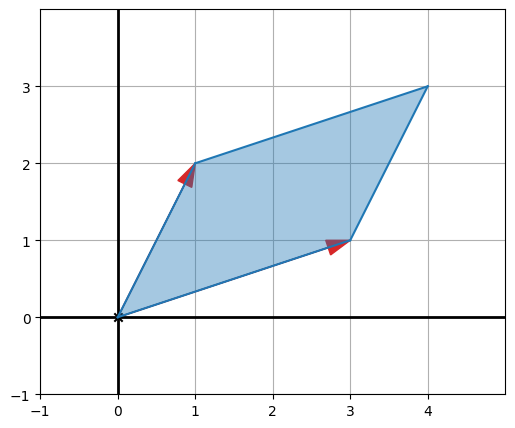

In [58]:
from vector_drawing import Polygon
u = 1, 2
v = 3, 1
draw(
    Arrow(u),
    Arrow(v),
    Polygon((0, 0), u, add(u, v), v, fill=True)
)



同时，也能够发现，两个向量为同一方向时，向量积为零向量，这有两种说法：

1. 就方向来说，两个平行的向量，它的垂直方向是不唯一的
2. 就“垂直程度”，或者两向量构成的平行四边形的面积来说，两个平行的向量的垂直程度是0，而它们构成的平行四边形的面积也是0。

<!-- 根据上面的信息，可以尝试推测出向量积的算法：

1. 关于长度，向量积的长度是两个向量构成的平行四边形的面积，设两个向量 $u,v$ 的夹角是 $\theta$，则面积为 $|u||v|\sin \theta$（设 $|u|$ 为底，则高为 $|v|\sin \theta$，反之亦然）
2. 关于方向，已知向量积和两个向量垂直，即向量积和任一向量的点积为0。

这足够立出四个方程，设向量积的坐标为 $(x,y,z)$，两个入参向量坐标为 $(x_u,y_u,z_u),(x_v,y_v,z_v)$：

$$\begin{align}
\sqrt{x^2+y^2+z^2} & = \sqrt{{x_u}^2+{y_u}^2+{z_u}^2}\sqrt{{x_v}^2+{y_v}^2+{z_v}^2}\sin \theta \\
\cos \theta & = \frac{x_u x_v + y_u y_v + z_u z_v}{\sqrt{{x_u}^2+{y_u}^2+{z_u}^2}\sqrt{{x_v}^2+{y_v}^2+{z_v}^2}} \\
x x_u + y y_u + z z_u & = 0 \\
x x_v + y y_v + z z_v & = 0 
\end{align}$$

遗憾的是，这个好像求不出来hhh。 -->

尝试列出公式去求它，但发现这玩意儿好难hhh。这可能是因为它不太通用——它在三维空间中的定义难以直接推广到其他维度。下面直接给出它的Python定义，以及随便绘制一个：

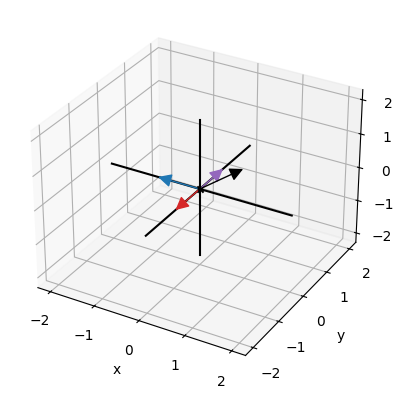

In [59]:
def cross_product(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return uy*vz - vy*uz, uz*vx - vz*ux, ux*vy + uy*vx # 注意这里的y分量是先z再x，不要写反了！

u = (1, 3, 4)
v = (2, -5, 3)

u = 1, 0, 1
v = -1, 0, 0

draw3d(
    Arrow3D(u, color=black),
    Arrow3D(v, color=blue),
    Arrow3D(cross_product(u, v), color=red),
    Arrow3D(cross_product(v, u), color=purple),
)

向量积的公式推导我get不到……只能记住了。第一课就这样了。